In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 109.5/109.5 kB 708.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
start = '2010-01-01'
end = '2021-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

TypeError: string indices must be integers

In [7]:
!pip install --upgrade pandas_datareader


Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 72.2/72.2 kB 394.6 kB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 62.6/62.6 kB 670.9 kB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=2bb2c3f88de4465f93a21769588f0586755221125e031768dba6b7033fa148ad
  Stored in directory: c:\users\lipik\appdata\local\pip\cache\wheels\e2\b9\da\716514851b65304b2d24f2a161398b9470da589b08a5

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.27 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [9]:
import yfinance as yf

start = '2010-01-01'
end = '2021-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.478999  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.490200  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.386965  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.375156  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.417542  447610800


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.288620,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.292892,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.264633,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.353607,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.186935,59773000


In [12]:
df=df.reset_index()

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [15]:
df=df.drop(['Date','Adj Close'],axis=1)

In [16]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


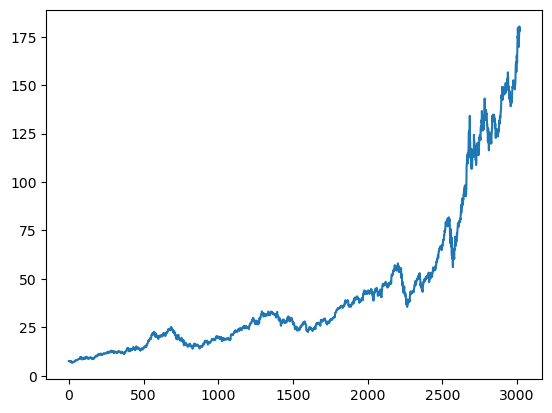

In [18]:
plt.plot(df.Close)

In [19]:
ma100=df.Close.rolling(100).mean()

In [20]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    153.0106
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
Name: Close, Length: 3020, dtype: float64

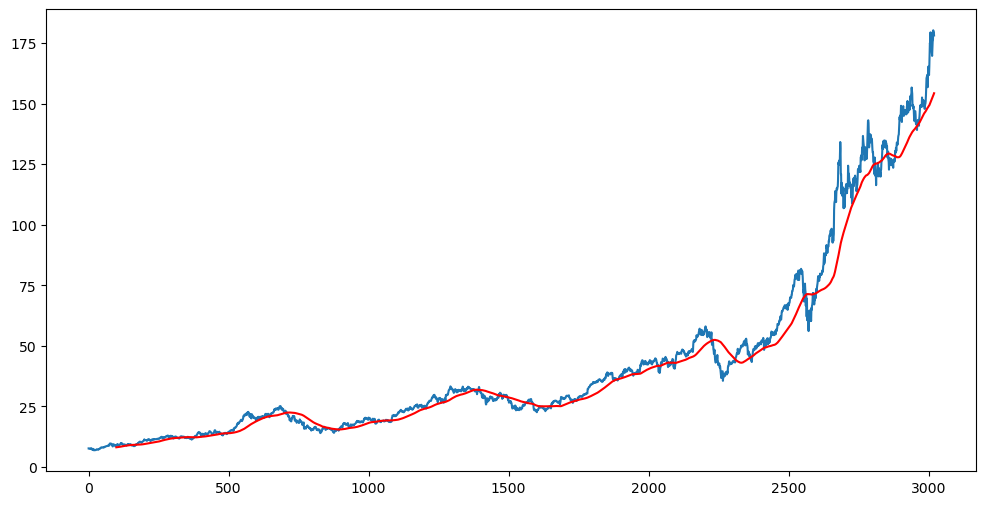

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

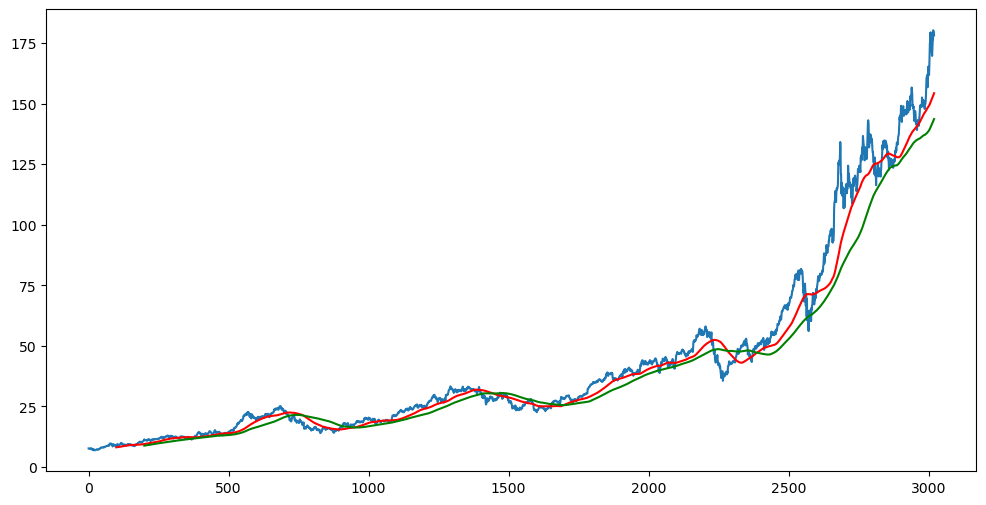

In [22]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [23]:
df.shape

(3020, 5)

In [ ]:
#splitting in training and testing

In [25]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [28]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [29]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [39]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [43]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#ML model

In [45]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [48]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [50]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 47s 600ms/step - loss: 0.0421
Epoch 2/50
63/63 [==============================] - 37s 584ms/step - loss: 0.0089
Epoch 3/50
63/63 [==============================] - 36s 570ms/step - loss: 0.0076
Epoch 4/50
63/63 [==============================] - 35s 556ms/step - loss: 0.0065
Epoch 5/50
63/63 [==============================] - 36s 573ms/step - loss: 0.0067
Epoch 6/50
63/63 [==============================] - 36s 573ms/step - loss: 0.0060
Epoch 7/50
63/63 [==============================] - 35s 558ms/step - loss: 0.0050
Epoch 8/50
63/63 [==============================] - 36s 574ms/step - loss: 0.0049
Epoch 9/50
63/63 [==============================] - 35s 562ms/step - loss: 0.0051
Epoch 10/50
63/63 [==============================] - 35s 560ms/step - loss: 0.0055
Epoch 11/50
63/63 [==============================] - 35s 558ms/step - loss: 0.0045
Epoch 12/50
63/63 [==============================] - 36s 565ms/step - loss: 0.0045
Epoch 13/50
6

In [51]:
model.save('kera_model.h5')

In [52]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [53]:
past_100_days=data_training.tail(100)

In [54]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\lipik\AppData\Local\Temp\ipykernel_5032\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [55]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [59]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99281675],
       [0.99343845],
       [0.98528824]])

In [60]:
input_data.shape

(1006, 1)

In [62]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [63]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [ ]:
#making predictions

In [64]:
y_predicted=model.predict(x_test)

29/29 [==============================] - 4s 110ms/step


In [65]:
y_predicted.shape

(906, 1)

In [66]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [67]:
y_predicted

array([[0.12840286],
       [0.12919742],
       [0.1298844 ],
       [0.13046974],
       [0.13097918],
       [0.13145153],
       [0.13192941],
       [0.13244972],
       [0.13303225],
       [0.13367122],
       [0.13434528],
       [0.13503449],
       [0.13571066],
       [0.13634703],
       [0.13691092],
       [0.13737538],
       [0.13770643],
       [0.13788514],
       [0.13790357],
       [0.13776398],
       [0.13746421],
       [0.13702485],
       [0.13647771],
       [0.13586655],
       [0.13523287],
       [0.1346237 ],
       [0.13405856],
       [0.13355121],
       [0.13312545],
       [0.13281493],
       [0.13264242],
       [0.13260075],
       [0.13268661],
       [0.1328947 ],
       [0.13321003],
       [0.13361473],
       [0.13408199],
       [0.13459161],
       [0.13512412],
       [0.13566187],
       [0.13619864],
       [0.13674285],
       [0.13730016],
       [0.13785116],
       [0.1383636 ],
       [0.13881063],
       [0.13924617],
       [0.139

In [68]:
scaler.scale_

array([0.00690691])

In [69]:
scale_factor=1/0.00690691
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

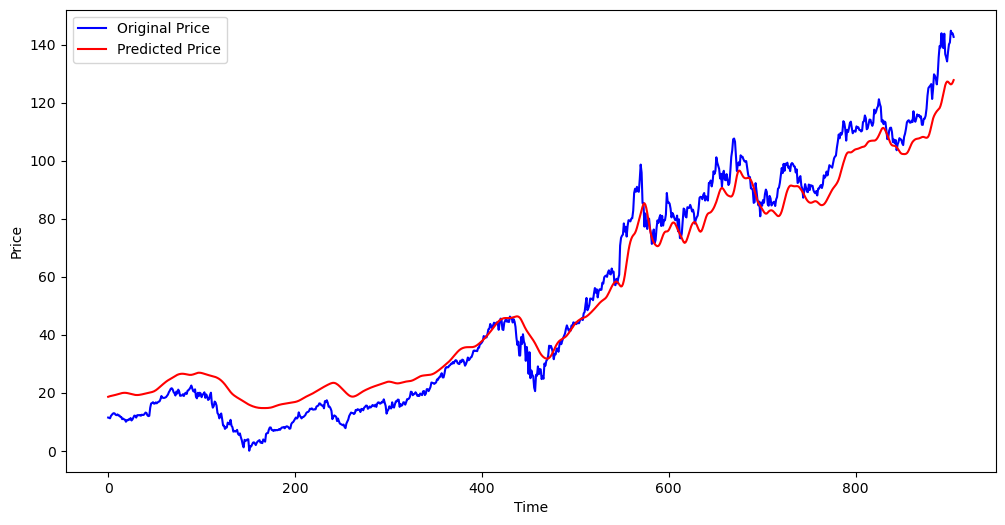

In [70]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()